# Import Libraries

### The necessary libraries for data manipulation, visualization, and calculation are imported.

#### Imports: Libraries for data handling, model training, and evaluation.

#### Load Dataset: Reads 'wdbc.data', assigns column names (ID, Diagnosis, Features 1-30).

#### Display: Shows the first 10 rows.

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
columns = ['ID', 'Diagnosis'] + [f'Feature_{i}' for i in range(1, 31)]
data = pd.read_csv('wdbc.data', header=None, names=columns)

# Show the first 5 rows
print(data.head(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
0    842302         M      17.99      10.38     122.80     1001.0    0.11840   
1    842517         M      20.57      17.77     132.90     1326.0    0.08474   
2  84300903         M      19.69      21.25     130.00     1203.0    0.10960   
3  84348301         M      11.42      20.38      77.58      386.1    0.14250   
4  84358402         M      20.29      14.34     135.10     1297.0    0.10030   
5    843786         M      12.45      15.70      82.57      477.1    0.12780   
6    844359         M      18.25      19.98     119.60     1040.0    0.09463   
7  84458202         M      13.71      20.83      90.20      577.9    0.11890   
8    844981         M      13.00      21.82      87.50      519.8    0.12730   
9  84501001         M      12.46      24.04      83.97      475.9    0.11860   

   Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
0    0.27760    0.30010    0.14710  ... 

#### Dataset includes ID, Diagnosis, and features.

#### Check if 'Diagnosis' is imbalanced.

## Inspecting the data

### Print last 10 rows

In [3]:
print(data.tail(10))

         ID Diagnosis  Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  \
559  925291         B      11.51      23.93      74.52      403.5    0.09261   
560  925292         B      14.05      27.15      91.38      600.4    0.09929   
561  925311         B      11.20      29.37      70.67      386.0    0.07449   
562  925622         M      15.22      30.62     103.40      716.9    0.10480   
563  926125         M      20.92      25.09     143.00     1347.0    0.10990   
564  926424         M      21.56      22.39     142.00     1479.0    0.11100   
565  926682         M      20.13      28.25     131.20     1261.0    0.09780   
566  926954         M      16.60      28.08     108.30      858.1    0.08455   
567  927241         M      20.60      29.33     140.10     1265.0    0.11780   
568   92751         B       7.76      24.54      47.92      181.0    0.05263   

     Feature_6  Feature_7  Feature_8  ...  Feature_21  Feature_22  Feature_23  \
559    0.10210    0.11120    0.04105  

### data.shape: Returns the dimensions of the dataset (rows, columns)

In [4]:
data.shape

(569, 32)

### data.info(): Displays concise summary of the dataset, including the number of non-null entries, data types, and memory usage

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   Feature_1   569 non-null    float64
 3   Feature_2   569 non-null    float64
 4   Feature_3   569 non-null    float64
 5   Feature_4   569 non-null    float64
 6   Feature_5   569 non-null    float64
 7   Feature_6   569 non-null    float64
 8   Feature_7   569 non-null    float64
 9   Feature_8   569 non-null    float64
 10  Feature_9   569 non-null    float64
 11  Feature_10  569 non-null    float64
 12  Feature_11  569 non-null    float64
 13  Feature_12  569 non-null    float64
 14  Feature_13  569 non-null    float64
 15  Feature_14  569 non-null    float64
 16  Feature_15  569 non-null    float64
 17  Feature_16  569 non-null    float64
 18  Feature_17  569 non-null    float64
 19  Feature_18  569 non-null    f

### Statistical Summary: Gives statistical insights such as mean, standard deviation, min, and max for numerical columns.

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
Feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
Feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
Feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
Feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
Feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
Feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
Feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
Feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Dropin 'ID' Cloumn since we dont need that for scaling and separate features

In [7]:
# Drop ID column and separate features and target
data.drop('ID', axis=1, inplace=True)
X_original = data.drop('Diagnosis', axis=1)
y_original = data['Diagnosis']

### X_original contains only the features, and y_original contains the target values

## Outlier Detection: Using IQR (Interquartile Range)

#### calculate_outliers(df):
#### Calculates outliers for each feature using the Interquartile Range (IQR) method.
#### For each column, computes the lower and upper bounds, then counts values outside  those bounds.

#### outliers_per_feature: 
#### Stores the number of outliers for each feature.

#### Visualization: 
#### Plots a bar chart showing the number of outliers per feature.

Outliers per feature:
 Feature_1     14
Feature_2      7
Feature_3     13
Feature_4     25
Feature_5      6
Feature_6     16
Feature_7     18
Feature_8     10
Feature_9     15
Feature_10    15
Feature_11    38
Feature_12    20
Feature_13    38
Feature_14    65
Feature_15    30
Feature_16    28
Feature_17    22
Feature_18    19
Feature_19    27
Feature_20    28
Feature_21    17
Feature_22     5
Feature_23    15
Feature_24    35
Feature_25     7
Feature_26    16
Feature_27    12
Feature_28     0
Feature_29    23
Feature_30    24
dtype: int64


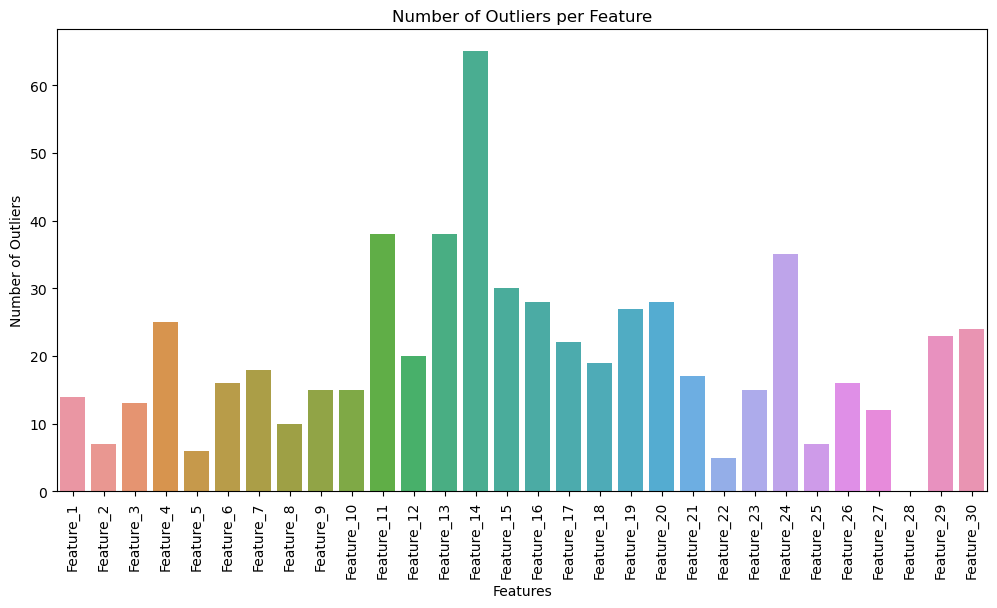

In [8]:
# Detect and store outliers
def calculate_outliers(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
    return pd.Series(outliers)

outliers_per_feature = calculate_outliers(X_original)
print("Outliers per feature:\n", outliers_per_feature)
plt.figure(figsize=(12, 6))
sns.barplot(x=outliers_per_feature.index, y=outliers_per_feature.values)
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.xlabel("Features")
plt.ylabel("Number of Outliers")
plt.show()

#### The number of outliers for each feature is calculated and visualized.
#### Features with higher counts of outliers can be identified via the bar chart

## Check for Misssing Values

#### Missing Values: Identifies any missing values across the dataset
#### value 0 means there are no missing values

In [9]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Diagnosis     0
Feature_1     0
Feature_2     0
Feature_3     0
Feature_4     0
Feature_5     0
Feature_6     0
Feature_7     0
Feature_8     0
Feature_9     0
Feature_10    0
Feature_11    0
Feature_12    0
Feature_13    0
Feature_14    0
Feature_15    0
Feature_16    0
Feature_17    0
Feature_18    0
Feature_19    0
Feature_20    0
Feature_21    0
Feature_22    0
Feature_23    0
Feature_24    0
Feature_25    0
Feature_26    0
Feature_27    0
Feature_28    0
Feature_29    0
Feature_30    0
dtype: int64


## Checki for Duplicates
#### Duplicate Check: Detects and counts duplicate rows and calculates their percentage

In [10]:
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"\nNumber of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


## Checking for unique values
#### Unique Values: Displays the number of unique values in each column, useful for identifying categorical data.

In [11]:
print("\nUnique Values in Each Column:")
print(data.nunique())


Unique Values in Each Column:
Diagnosis       2
Feature_1     456
Feature_2     479
Feature_3     522
Feature_4     539
Feature_5     474
Feature_6     537
Feature_7     537
Feature_8     542
Feature_9     432
Feature_10    499
Feature_11    540
Feature_12    519
Feature_13    533
Feature_14    528
Feature_15    547
Feature_16    541
Feature_17    533
Feature_18    507
Feature_19    498
Feature_20    545
Feature_21    457
Feature_22    511
Feature_23    514
Feature_24    544
Feature_25    411
Feature_26    529
Feature_27    539
Feature_28    492
Feature_29    500
Feature_30    535
dtype: int64


# Remove outliers

#### remove_outliers(X, y):
#### Removes outliers from the feature set (X) and target (y) based on the IQR method.
#### For each column, calculates the lower and upper bounds, and creates a mask to keep only non-outlier rows.
#### X_no_outliers, y_no_outliers: Stores the dataset after outlier removal

In [12]:
# Remove outliers
def remove_outliers(X, y):
    mask = pd.Series([True] * len(X))
    for column in X.columns:
        Q1 = X[column].quantile(0.25)
        Q3 = X[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        mask &= (X[column] >= lower_bound) & (X[column] <= upper_bound)
    return X[mask], y[mask]

X_no_outliers, y_no_outliers = remove_outliers(X_original, y_original)

# Applying VIF to Reduce Features

#### If dataset with features like Age, Salary, and Experience, this function will 

#### calculate how much each feature is explained by the others. If Age and Salary are

#### highly correlated, their VIFs will be high, indicating multicollinearity.

#### features with a VIF higher than a certain threshold (e.g., 10) are usually removed 

#### to reduce multicollinearity and improve the stability of the model

In [13]:
# Function to calculate VIF and drop features with high VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

## Remove features with VIF > 10
#### This code iteratively calculates the VIF for each feature in the dataset. If any

#### feature has a VIF greater than 10, it’s dropped, and the process repeats. The goal

#### is to remove features causing multicollinearity to improve model stability.

In [14]:
def drop_high_vif_features(X, threshold=10):
    while True:
        vif = calculate_vif(X)
        if vif['VIF'].max() > threshold:
            feature_to_drop = vif.loc[vif['VIF'].idxmax(), 'Feature']
            X.drop(columns=[feature_to_drop], inplace=True)
            print(f"Dropped feature '{feature_to_drop}' due to high VIF")
        else:
            break
    return X

X_vif = drop_high_vif_features(X_original.copy())

Dropped feature 'Feature_1' due to high VIF
Dropped feature 'Feature_21' due to high VIF
Dropped feature 'Feature_3' due to high VIF
Dropped feature 'Feature_23' due to high VIF
Dropped feature 'Feature_10' due to high VIF
Dropped feature 'Feature_25' due to high VIF
Dropped feature 'Feature_22' due to high VIF
Dropped feature 'Feature_30' due to high VIF
Dropped feature 'Feature_29' due to high VIF
Dropped feature 'Feature_7' due to high VIF
Dropped feature 'Feature_11' due to high VIF
Dropped feature 'Feature_28' due to high VIF
Dropped feature 'Feature_5' due to high VIF
Dropped feature 'Feature_6' due to high VIF
Dropped feature 'Feature_4' due to high VIF
Dropped feature 'Feature_26' due to high VIF
Dropped feature 'Feature_13' due to high VIF
Dropped feature 'Feature_9' due to high VIF
Dropped feature 'Feature_2' due to high VIF
Dropped feature 'Feature_18' due to high VIF
Dropped feature 'Feature_16' due to high VIF
Dropped feature 'Feature_24' due to high VIF
Dropped feature 'F

## To store different data for different models

In [15]:
# Scenarios
scenarios = {}


# With Outliers, Without SMOTE

In [16]:
# Scenario 1: With Outliers, Without SMOTE
X1 = X_vif.copy()
y1 = y_original.copy()

# With Outliers, With SMOTE

In [17]:
# Scenario 2: With Outliers, With SMOTE
smote = SMOTE(random_state=42)
X2, y2 = smote.fit_resample(X_vif, y_original)

# Without Outliers, Without SMOTE

In [18]:
# Scenario 3: Without Outliers, Without SMOTE
X3 = drop_high_vif_features(X_no_outliers.copy())  # Process X only
y3 = y_no_outliers.copy()  # Use the corresponding y without outliers
y3.reset_index(drop=True, inplace=True)  # Ensure indices are aligned with X3

Dropped feature 'Feature_1' due to high VIF
Dropped feature 'Feature_3' due to high VIF
Dropped feature 'Feature_23' due to high VIF
Dropped feature 'Feature_21' due to high VIF
Dropped feature 'Feature_30' due to high VIF
Dropped feature 'Feature_22' due to high VIF
Dropped feature 'Feature_25' due to high VIF
Dropped feature 'Feature_24' due to high VIF
Dropped feature 'Feature_10' due to high VIF
Dropped feature 'Feature_29' due to high VIF
Dropped feature 'Feature_11' due to high VIF
Dropped feature 'Feature_5' due to high VIF
Dropped feature 'Feature_26' due to high VIF
Dropped feature 'Feature_8' due to high VIF
Dropped feature 'Feature_28' due to high VIF
Dropped feature 'Feature_13' due to high VIF
Dropped feature 'Feature_9' due to high VIF
Dropped feature 'Feature_6' due to high VIF
Dropped feature 'Feature_2' due to high VIF
Dropped feature 'Feature_16' due to high VIF
Dropped feature 'Feature_27' due to high VIF
Dropped feature 'Feature_18' due to high VIF
Dropped feature '

# Without Outliers, With SMOTE

In [19]:
# Scenario 4: Without Outliers, With SMOTE
X4, y4 = smote.fit_resample(X3, y3)

# Visualize class distribution before and after SMOTE

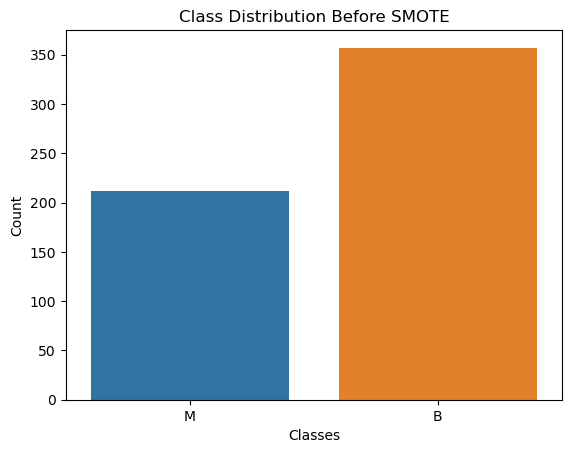

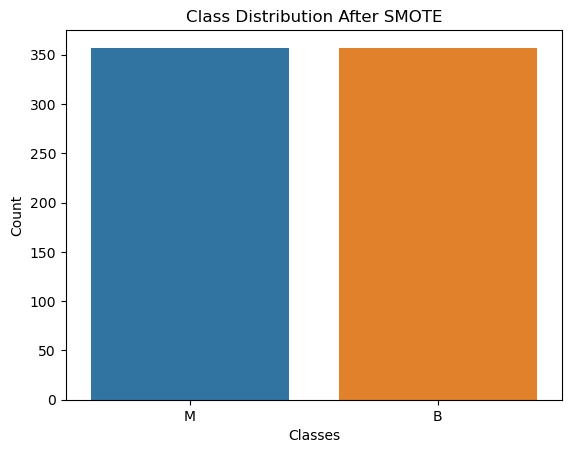

In [22]:
# Visualize class distribution
def plot_class_distribution(y, title):
    sns.countplot(x=y)
    plt.title(title)
    plt.xlabel("Classes")
    plt.ylabel("Count")
    plt.show()

# Before SMOTE
plot_class_distribution(y_original, "Class Distribution Before SMOTE")

# After SMOTE
_, y_with_outliers_with_smote = scenarios['With_Outliers_With_SMOTE']
plot_class_distribution(y_with_outliers_with_smote, "Class Distribution After SMOTE")


# Scaling Features

#### scaler = StandardScaler(): Initializes a scaler to standardize features.
#### Scaling Applied:
#### Standardizes all X datasets in different scenarios to have mean 0 and standard deviation 1.
#### Stores the scaled features and corresponding target (y) for each scenario in the scenarios dictionary.

In [23]:
# Scaling
scaler = StandardScaler()
scenarios['With_Outliers_No_SMOTE'] = (scaler.fit_transform(X1), y1)
scenarios['With_Outliers_With_SMOTE'] = (scaler.fit_transform(X2), y2)
scenarios['Without_Outliers_No_SMOTE'] = (scaler.fit_transform(X3), y3)
scenarios['Without_Outliers_With_SMOTE'] = (scaler.fit_transform(X4), y4)

# Milestone 2

# Model Training

#### This function evaluates the performance of the model for different scenarios and 

#### provides a detailed comparison of metrics.

In [24]:
# Model Training and Evaluation
def evaluate_model(X, y, scenario_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    model = AdaBoostClassifier(estimator=RandomForestClassifier(n_estimators=100, random_state=42), random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label='M'),
        "Recall": recall_score(y_test, y_pred, pos_label='M'),
        "F1 Score": f1_score(y_test, y_pred, pos_label='M'),
        "Confusion Matrix": confusion_matrix(y_test, y_pred)
    }
    print(f"\nMetrics for {scenario_name}:")
    for key, value in metrics.items():
        print(f"{key}: {value}")

# Evaluate all scenarios

In [25]:
# Evaluate all scenarios
for scenario_name, (X_scaled, y) in scenarios.items():
    evaluate_model(X_scaled, y, scenario_name)


Metrics for With_Outliers_No_SMOTE:
Accuracy: 0.935672514619883
Precision: 0.90625
Recall: 0.9206349206349206
F1 Score: 0.9133858267716536
Confusion Matrix: [[102   6]
 [  5  58]]

Metrics for With_Outliers_With_SMOTE:
Accuracy: 0.9720930232558139
Precision: 0.9705882352941176
Recall: 0.9705882352941176
F1 Score: 0.9705882352941176
Confusion Matrix: [[110   3]
 [  3  99]]

Metrics for Without_Outliers_No_SMOTE:
Accuracy: 0.9
Precision: 0.8928571428571429
Recall: 0.7352941176470589
F1 Score: 0.806451612903226
Confusion Matrix: [[83  3]
 [ 9 25]]

Metrics for Without_Outliers_With_SMOTE:
Accuracy: 0.9333333333333333
Precision: 0.95
Recall: 0.9313725490196079
F1 Score: 0.9405940594059405
Confusion Matrix: [[73  5]
 [ 7 95]]


## I observed that Metrics for With_Outliers_With_SMOTE has more than other metrics 

## so selecting With_Outliers_With_SMOTE for model

# Splitting the data and Define AdaBoost

#### Split the Data:train_test_split divides the scaled feature data (X_scaled) and the 

#### target data (y) into training (70%) and testing (30%) sets.



In [26]:
# Prepare data for "With Outliers and With SMOTE"
X_with_outliers_with_smote, y_with_outliers_with_smote = scenarios['With_Outliers_With_SMOTE']
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(
    X_with_outliers_with_smote, y_with_outliers_with_smote, test_size=0.3, random_state=42
)

# Define the AdaBoostClassifier with a base RandomForestClassifier
base_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
ada_boost_smote = AdaBoostClassifier(estimator=base_classifier, random_state=42)

# Milestone 3

# Grid Search to find the best combination of hyperparameters

#### This code searches for the best settings for an AdaBoost model.

#### Parameters to Test: It tries different values for:
      Number of trees (n_estimators)
      Step size (learning_rate)
      Boosting type (algorithm)
     
#### Grid Search: It uses GridSearchCV to test all combinations of these settings.

#### Best Settings: It finds and prints the best settings for highest accuracy.

In [27]:
# Define the hyperparameter grid
from sklearn.model_selection import GridSearchCV

param_grid_smote = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

# Perform hyperparameter tuning with GridSearchCV
grid_search_smote = GridSearchCV(
    estimator=ada_boost_smote,
    param_grid=param_grid_smote,
    cv=5,
    n_jobs=-1,
    verbose=1,
    scoring='accuracy'
)
grid_search_smote.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters
best_params_smote = grid_search_smote.best_params_
print(f"\nBest Hyperparameters (With Outliers, With SMOTE): {best_params_smote}")

Fitting 5 folds for each of 32 candidates, totalling 160 fits

Best Hyperparameters (With Outliers, With SMOTE): {'algorithm': 'SAMME', 'learning_rate': 0.01, 'n_estimators': 50}


# Re-evaluating the Tuned Model

In [28]:
# Evaluate the best model found from GridSearchCV
best_model_smote = grid_search_smote.best_estimator_
y_pred_smote_tuned = best_model_smote.predict(X_test_smote)

# Calculate performance metrics for the tuned model
accuracy_smote_tuned = accuracy_score(y_test_smote, y_pred_smote_tuned)
precision_smote_tuned = precision_score(y_test_smote, y_pred_smote_tuned, pos_label='M')
recall_smote_tuned = recall_score(y_test_smote, y_pred_smote_tuned, pos_label='M')
f1_smote_tuned = f1_score(y_test_smote, y_pred_smote_tuned, pos_label='M')
conf_matrix_smote_tuned = confusion_matrix(y_test_smote, y_pred_smote_tuned)

# Print tuned model performance metrics
print("\nTuned Model Performance Metrics (With Outliers, With SMOTE):")
print(f"Accuracy: {accuracy_smote_tuned:.2f}")
print(f"Precision: {precision_smote_tuned:.2f}")
print(f"Recall: {recall_smote_tuned:.2f}")
print(f"F1 Score: {f1_smote_tuned:.2f}")
print("\nConfusion Matrix for Tuned Model (With Outliers, With SMOTE):")
print(conf_matrix_smote_tuned)


Tuned Model Performance Metrics (With Outliers, With SMOTE):
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97

Confusion Matrix for Tuned Model (With Outliers, With SMOTE):
[[110   3]
 [  3  99]]


# Milestone 4

## Visualization and Interpretation of Results Learning

# Confusion Matrix

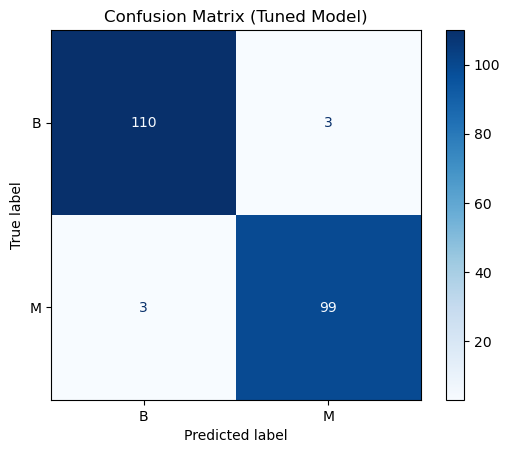

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
conf_matrix_smote_tuned = confusion_matrix(y_test_smote, y_pred_smote_tuned)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_smote_tuned, display_labels=best_model_smote.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Tuned Model)")
plt.show()


# ROC curve and AUC

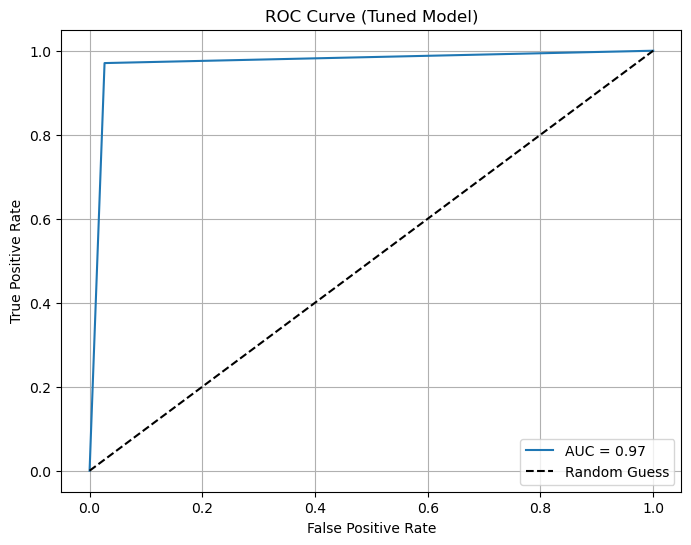

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get probabilities for ROC curve
y_prob_smote_tuned = best_model_smote.predict_proba(X_test_smote)[:, 1]  # Probability of positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test_smote, y_prob_smote_tuned, pos_label='M')
roc_auc = roc_auc_score(y_test_smote, y_prob_smote_tuned)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve (Tuned Model)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()


# Feature importance

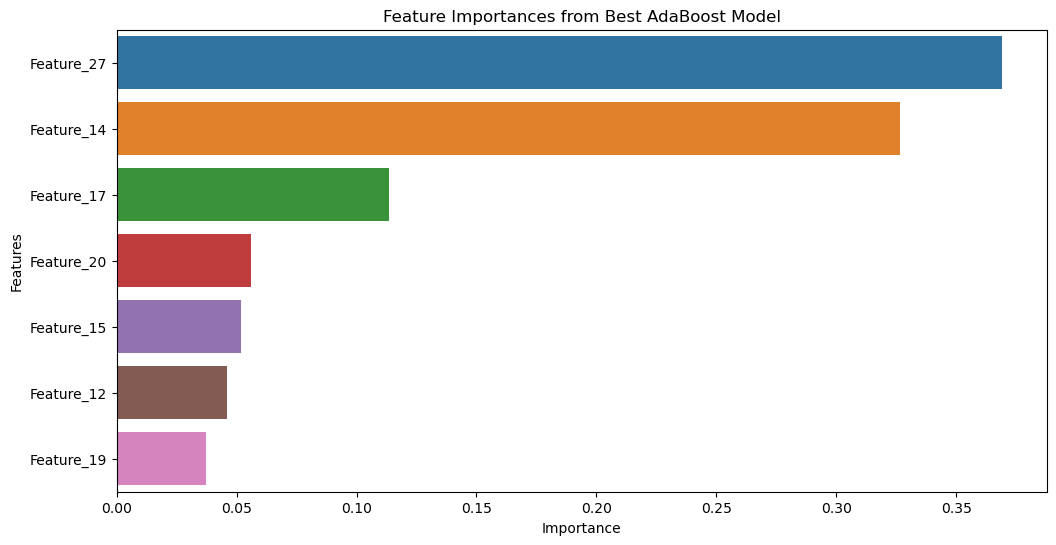

In [32]:
# Get feature importances from AdaBoostClassifier
feature_importances = best_model_smote.feature_importances_

# Plot feature importances
def plot_feature_importances(importances, feature_names, title):
    importance_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    }).sort_values(by="Importance", ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=importance_df["Importance"], y=importance_df["Feature"])
    plt.title(title)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

plot_feature_importances(
    feature_importances, 
    X_vif.columns, 
    "Feature Importances from Best AdaBoost Model"
)


In [36]:
import pickle
scaler.fit(X2)
# Save the trained model
with open('model.pkl', 'wb') as model_file:
    pickle.dump(best_model_smote, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully.")


Model and scaler saved successfully.
